In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
usdrub = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_usdrub.csv', sep = ';', index_col = 0)
usdrub.index = pd.to_datetime(usdrub.index, format = '%d.%m.%Y')
usdrub = usdrub.sort_index(ascending = True)
usdrub = usdrub.loc['1998':]
usdrub['curs'] = usdrub['curs'].astype(float)

sber = pd.read_csv(r'https://raw.githubusercontent.com/tea4erman/Sinergia-Time-Series/refs/heads/main/Data/lesson1_sber.csv', index_col = 0)
sber['TRADEDATE'] = pd.to_datetime(sber['TRADEDATE'])
sber = sber.set_index('TRADEDATE', drop = True)

data = pd.merge(left = usdrub, right = sber, how = 'inner', left_index = True, right_index = True).dropna()
data.columns = ['usdrub', 'sber']
data.head()

,usdrub,sber
2013-03-26,30.7585,97.20
2013-03-27,30.8734,96.75
2013-03-28,30.8630,98.59
2013-03-29,30.9962,98.76
2013-04-02,31.1093,98.93


In [15]:
from statsmodels.tsa.vector_ar import vecm

In [17]:
model = vecm.VECM(data)

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [18]:
results = model.fit()
print(results.summary())

Det. terms outside the coint. relation & lagged endog. parameters for equation usdrub
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.usdrub      0.0675      0.020      3.334      0.001       0.028       0.107
L1.sber       -0.0633      0.005    -14.029      0.000      -0.072      -0.054
Det. terms outside the coint. relation & lagged endog. parameters for equation sber
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.usdrub     -0.1173      0.094     -1.242      0.214      -0.302       0.068
L1.sber        0.1027      0.021      4.881      0.000       0.061       0.144
               Loading coefficients (alpha) for equation usdrub               
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------

In [23]:
vecm.select_order(data, maxlags = 10).summary()

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda\Lib\site-packages\statsmodel

,AIC,BIC,FPE,HQIC
0,2.936,2.951,18.84,2.941
1,2.839,2.865*,17.10,2.848
2,2.838,2.873,17.08,2.851
3,2.824,2.870,16.84,2.841*
4,2.824*,2.880,16.84*,2.844
5,2.824,2.890,16.85,2.848
6,2.826,2.902,16.87,2.854
7,2.828,2.915,16.92,2.860
8,2.829,2.925,16.92,2.864
9,2.827,2.934,16.90,2.866


In [41]:
rank_test = vecm.select_coint_rank(data, det_order = 0, k_ar_diff = 1, method = "trace")
print(rank_test.summary())

Johansen cointegration test using trace test statistic with 5% significance level
r_0 r_1 test statistic critical value
-------------------------------------
  0   2          10.34          15.49
-------------------------------------


In [40]:
rank_test.rank

0

In [44]:
model = vecm.VECM(data.iloc[:-3])
results = model.fit()
fcst = results.predict(steps = 3)

C:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


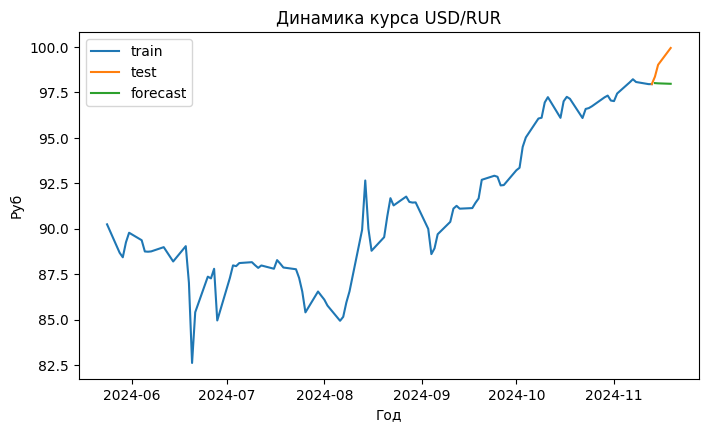

In [47]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data.iloc[-100:-3]['usdrub'], label = 'train')
plt.plot(data.iloc[-4:]['usdrub'], label = 'test')
plt.plot(data.iloc[-3:].index, fcst[:,0], label = 'forecast')
plt.xlabel('Год')
plt.ylabel('Руб')
plt.title('Динамика курса USD/RUR')
plt.legend()
plt.show()

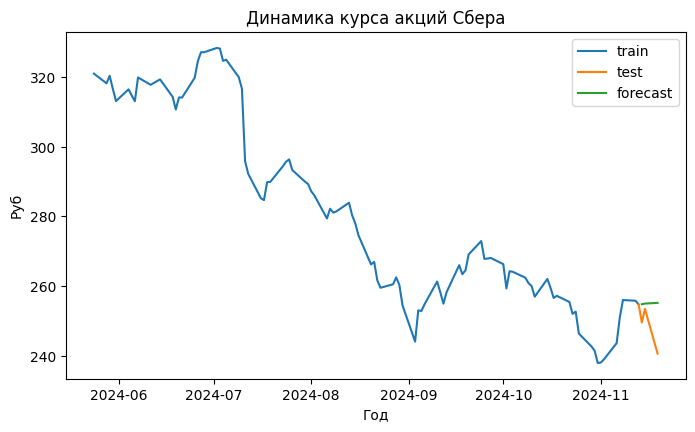

In [48]:
fig = plt.figure(figsize = (8,4.5))
plt.plot(data.iloc[-100:-3]['sber'], label = 'train')
plt.plot(data.iloc[-4:]['sber'], label = 'test')
plt.plot(data.iloc[-3:].index, fcst[:,1], label = 'forecast')
plt.xlabel('Год')
plt.ylabel('Руб')
plt.title('Динамика курса акций Сбера')
plt.legend()
plt.show()